## This script was developed for:
#### Zhu, F. and B.E.J. Rose. (2022). Multiple Equilibria in a Coupled Climate-Carbon Model. Journal of Climate. DOI: 10.1175/JCLI-D-21-0984.1

Author of the script: *Fangze Zhu*

University at Albany, State University of New York (SUNY)

In [1]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from numpy import dtype
from scipy.signal import savgol_filter

mitdir = '/nfs/home11/grad/2017/fz172169/MITgcm/utils/python/MITgcmutils'
os.chdir(mitdir)
import MITgcmutils as mit

csdir = '/nfs/home11/grad/2017/fz172169/Documents/my_scripts'
os.chdir(csdir)
from cs import zonalKernel
from cs import zonalAvg

In [2]:
def write_ncfile(filename, 
                 varname1=None, varname2=None, varname3=None, varname4=None, varname5=None,
                 units1=None, units2=None, units3=None, units4=None, units5=None,
                 varout1=None, varout2=None, varout3=None, varout4=None, varout5=None):

    # open a netCDF file to write
    ncout = Dataset(filename, 'w', format='NETCDF4')

    # define axis size
    ncout.createDimension('time', None)  # unlimited
    ncout.createDimension('lev', Z-1)
    ncout.createDimension('lat', Y)
    ncout.createDimension('lon', X)
    
    # create time axis
    time = ncout.createVariable('time', dtype('double').char, ('time',))
    time.long_name = 'day'

    # create vertical axis
    lev = ncout.createVariable('lev', dtype('double').char, ('lev',))
    lev.long_name = 'vertical coordinate'
    lev.units = 'hPa'

    # create latitude axis
    lat = ncout.createVariable('lat', dtype('double').char, ('lat',))
    lat.long_name = 'latitude'
    lat.units = 'degrees_north'

    # create longitude axis
    lon = ncout.createVariable('lon', dtype('double').char, ('lon',))
    lon.long_name = 'longitude'
    lon.units = 'degrees_east'

    # create variable array
    if varname1 !=None:  # T
        vout1 = ncout.createVariable(varname1, dtype('double').char, ('time', 'lev', 'lat', 'lon',))
        vout1.units = units1
    
    if varname2 !=None:  # Q
        vout2 = ncout.createVariable(varname2, dtype('double').char, ('time', 'lev', 'lat', 'lon',))
        vout2.units = units2

    if varname3 !=None:  # surfT
        vout3 = ncout.createVariable(varname3, dtype('double').char, ('time', 'lat', 'lon',))
        vout3.units = units3

    if varname4 !=None:  # albedo
        vout4 = ncout.createVariable(varname4, dtype('double').char, ('time', 'lat', 'lon',))
        vout4.units = units4

    if varname5 !=None:  # TS
        vout5 = ncout.createVariable(varname5, dtype('double').char, ())
        vout5.units = units5

    # copy axis from original dataset
    if varname1 != None:
        time[:] = np.arange(varout1.shape[0])+1
    elif varname2 != None:
        time[:] = np.arange(varout2.shape[0])+1
    elif varname4 != None:
        time[:] = np.arange(varout4.shape[0])+1
    lev[:] = grid_atm['Z'][0:Z-1]/100.
    lat[:] = grid_atm['Y']
    lon[:] = grid_atm['X']
    
    if varname1 !=None:
        vout1[:] = varout1
    if varname2 !=None:
        vout2[:] = varout2
    if varname3 !=None:
        vout3[:] = varout3
    if varname4 !=None:
        vout4[:] = varout4
    if varname5 !=None:
        vout5[:] = varout5

    # close files
    ncout.close()

In [3]:
def write_ncfile_Z(filename, 
                 varname1=None, varname2=None, varname3=None, varname4=None, varname5=None,
                 units1=None, units2=None, units3=None, units4=None, units5=None,
                 varout1=None, varout2=None, varout3=None, varout4=None, varout5=None):

    # open a netCDF file to write
    ncout = Dataset(filename, 'w', format='NETCDF4')

    # define axis size
    ncout.createDimension('time', None)  # unlimited
    ncout.createDimension('lev', Z)
    ncout.createDimension('lat', Y)
    ncout.createDimension('lon', X)
    
    # create time axis
    time = ncout.createVariable('time', dtype('double').char, ('time',))
    time.long_name = 'day'

    # create vertical axis
    lev = ncout.createVariable('lev', dtype('double').char, ('lev',))
    lev.long_name = 'vertical coordinate'
    lev.units = 'hPa'

    # create latitude axis
    lat = ncout.createVariable('lat', dtype('double').char, ('lat',))
    lat.long_name = 'latitude'
    lat.units = 'degrees_north'

    # create longitude axis
    lon = ncout.createVariable('lon', dtype('double').char, ('lon',))
    lon.long_name = 'longitude'
    lon.units = 'degrees_east'

    # create variable array
    if varname1 !=None:  # T
        vout1 = ncout.createVariable(varname1, dtype('double').char, ('time', 'lev', 'lat', 'lon',))
        vout1.units = units1
    
    if varname2 !=None:  # Q
        vout2 = ncout.createVariable(varname2, dtype('double').char, ('time', 'lev', 'lat', 'lon',))
        vout2.units = units2

    if varname3 !=None:  # surfT
        vout3 = ncout.createVariable(varname3, dtype('double').char, ('time', 'lat', 'lon',))
        vout3.units = units3

    if varname4 !=None:  # albedo
        vout4 = ncout.createVariable(varname4, dtype('double').char, ('time', 'lat', 'lon',))
        vout4.units = units4

    if varname5 !=None:  # TS
        vout5 = ncout.createVariable(varname5, dtype('double').char, ())
        vout5.units = units5

    # copy axis from original dataset
    if varname1 != None:
        time[:] = np.arange(varout1.shape[0])+1
    elif varname2 != None:
        time[:] = np.arange(varout2.shape[0])+1
    elif varname4 != None:
        time[:] = np.arange(varout4.shape[0])+1
    lev[:] = grid_atm['Z'][0:Z]/100.
    lat[:] = grid_atm['Y']
    lon[:] = grid_atm['X']
    
    if varname1 !=None:
        vout1[:] = varout1
    if varname2 !=None:
        vout2[:] = varout2
    if varname3 !=None:
        vout3[:] = varout3
    if varname4 !=None:
        vout4[:] = varout4
    if varname5 !=None:
        vout5[:] = varout5

    # close files
    ncout.close()

In [4]:
def write_ncfile_timeseries(filename, 
                            varname1=None, varname2=None, varname3=None, varname4=None, varname5=None,
                            units1=None, units2=None, units3=None, units4=None, units5=None,
                            varout1=None, varout2=None, varout3=None, varout4=None, varout5=None):

    # open a netCDF file to write
    ncout = Dataset(filename, 'w', format='NETCDF4')

    # define axis size
    ncout.createDimension('time', None)  # unlimited
    ncout.createDimension('mon', 12)
    ncout.createDimension('lev', Z)
    ncout.createDimension('lev-1', Z-1)
    ncout.createDimension('lat', Y)
    ncout.createDimension('lon', X)
    
    # create time axis
    time = ncout.createVariable('time', dtype('double').char, ('time',))
    time.long_name = '20-year'
    
    # create mon axis
    mon = ncout.createVariable('mon', dtype('double').char, ('mon',))
    mon.long_name = 'month'

    # create vertical axis
    lev = ncout.createVariable('lev', dtype('double').char, ('lev',))
    lev.long_name = 'vertical coordinate'
    lev.units = 'hPa'
    
    lev_1 = ncout.createVariable('lev-1', dtype('double').char, ('lev-1',))
    lev_1.long_name = 'vertical coordinate'
    lev_1.units = 'hPa'

    # create latitude axis
    lat = ncout.createVariable('lat', dtype('double').char, ('lat',))
    lat.long_name = 'latitude'
    lat.units = 'degrees_north'

    # create longitude axis
    lon = ncout.createVariable('lon', dtype('double').char, ('lon',))
    lon.long_name = 'longitude'
    lon.units = 'degrees_east'

    # create variable array
    if varname1 !=None:  # T
        vout1 = ncout.createVariable(varname1, dtype('double').char, ('time', 'mon', 'lev', 'lat', 'lon',))
        vout1.units = units1
    
    if varname2 !=None:  # Q
        vout2 = ncout.createVariable(varname2, dtype('double').char, ('time', 'mon', 'lev-1', 'lat', 'lon',))
        vout2.units = units2

    if varname3 !=None:  # surfT, albedo, ASR, OLR
        vout3 = ncout.createVariable(varname3, dtype('double').char, ('time', 'mon', 'lat', 'lon',))
        vout3.units = units3

    if varname4 !=None:  # CO2
        vout4 = ncout.createVariable(varname4, dtype('double').char, ('time', 'mon',))
        vout4.units = units4

    if varname5 !=None:  # TS
        vout5 = ncout.createVariable(varname5, dtype('double').char, ('time',))
        vout5.units = units5

    # copy axis from original dataset
    if varname1 != None:
        time[:] = np.arange(varout1.shape[0])+1
    elif varname2 != None:
        time[:] = np.arange(varout2.shape[0])+1
    elif varname3 != None:
        time[:] = np.arange(varout3.shape[0])+1
    elif varname4 != None:
        time[:] = np.arange(varout4.shape[0])+1
    else:
        time[:] = np.arange(varout5.shape[0])+1
    mon[:] = np.arange(12)+1
    lev[:] = grid_atm['Z'][0:Z]/100.
    lev_1[:] = grid_atm['Z'][0:Z-1]/100.
    lat[:] = grid_atm['Y']
    lon[:] = grid_atm['X']
    
    if varname1 !=None:
        vout1[:] = varout1
    if varname2 !=None:
        vout2[:] = varout2
    if varname3 !=None:
        vout3[:] = varout3
    if varname4 !=None:
        vout4[:] = varout4
    if varname5 !=None:
        vout5[:] = varout5

    # close files
    ncout.close()

In [5]:
def read_ncfile(filename, varname, index=None):
    ncin = Dataset(filename, 'r', format='NETCDF4')
    if index == None:
        vin = ncin.variables[varname][:]
    else:
        vin = ncin.variables[varname][index]
    return vin

In [6]:
def timeseries(run, varlist):
       
    print(run)
    periods = str(len(glob(os.path.join(dir, run) + '/out/Cpl*')))
    
    if 'T' in varlist:
        print('T')
        T_period = np.zeros((12,Z,Y,X))
        T = np.zeros((int(periods),12,Z,Y,X))
        if run in run_list_warm:
            for n in range(int(periods)):
                DiagAtmTave = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAtmTave.*')
                theta_atm = DiagAtmTave['THETA']
                for k in range(Z):
                    T_period[:,k,:,:] = theta_atm[:,k,:,:]*(P[k]/1E5)**(2./7.)
                T[n,:,:,:,:] = T_period
        if run in run_list_cold:
            for n in range(1,50):
                DiagAtmTave = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_2_50') + \
                                        '/out/Cpl'+str(n+1)+'/Atm/DiagAtmTave.*')
                theta_atm = DiagAtmTave['THETA']
                for k in range(Z):
                    T_period[:,k,:,:] = theta_atm[:,k,:,:]*(P[k]/1E5)**(2./7.)
                T[n,:,:,:,:] = T_period
            for n in range(50,100):
                DiagAtmTave = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_51_100') + \
                                        '/out/Cpl'+str(n+1)+'/Atm/DiagAtmTave.*')
                theta_atm = DiagAtmTave['THETA']
                for k in range(Z):
                    T_period[:,k,:,:] = theta_atm[:,k,:,:]*(P[k]/1E5)**(2./7.)
                T[n,:,:,:,:] = T_period
            for n in range(100,150):
                DiagAtmTave = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_101_150') + \
                                        '/out/Cpl'+str(n+1)+'/Atm/DiagAtmTave.*')
                theta_atm = DiagAtmTave['THETA']
                for k in range(Z):
                    T_period[:,k,:,:] = theta_atm[:,k,:,:]*(P[k]/1E5)**(2./7.)
                T[n,:,:,:,:] = T_period
            for n in range(150,200):
                DiagAtmTave = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_151_200') + \
                                        '/out/Cpl'+str(n+1)+'/Atm/DiagAtmTave.*')
                theta_atm = DiagAtmTave['THETA']
                for k in range(Z):
                    T_period[:,k,:,:] = theta_atm[:,k,:,:]*(P[k]/1E5)**(2./7.)
                T[n,:,:,:,:] = T_period
            for n in range(200,int(periods)):
                DiagAtmTave = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAtmTave.*')
                theta_atm = DiagAtmTave['THETA']
                for k in range(Z):
                    T_period[:,k,:,:] = theta_atm[:,k,:,:]*(P[k]/1E5)**(2./7.)
                T[n,:,:,:,:] = T_period
        if run in run_list_waterbelt:
            for n in range(int(periods)):
                DiagAtmTave = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagAtmTave.*')
                theta_atm = DiagAtmTave['THETA']
                for k in range(Z):
                    T_period[:,k,:,:] = theta_atm[:,k,:,:]*(P[k]/1E5)**(2./7.)
                T[n,:,:,:,:] = T_period
        os.chdir(os.path.join(datadir,'time_series'))
        write_ncfile_timeseries(filename=run+'_T.nc', 
                                varname1='T', 
                                units1='K', 
                                varout1=T)
    if 'Q' in varlist:   
        print('Q')
        Q = np.zeros((int(periods),12,Z-1,Y,X))
        if run in run_list_warm:
            for n in range(int(periods)):
                DiagAtmTave = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAtmTave.*')
                Q_period = DiagAtmTave['SALT'][:,0:Z-1,:,:]
                Q[n,:,:,:,:] = Q_period
        if run in run_list_cold:
            for n in range(1,50):
                DiagAtmTave = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_2_50') + \
                                        '/out/Cpl'+str(n+1)+'/Atm/DiagAtmTave.*')
                Q_period = DiagAtmTave['SALT'][:,0:Z-1,:,:]
                Q[n,:,:,:,:] = Q_period
            for n in range(50,100):
                DiagAtmTave = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_51_100') + \
                                        '/out/Cpl'+str(n+1)+'/Atm/DiagAtmTave.*')
                Q_period = DiagAtmTave['SALT'][:,0:Z-1,:,:]
                Q[n,:,:,:,:] = Q_period
            for n in range(100,150):
                DiagAtmTave = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_101_150') + \
                                        '/out/Cpl'+str(n+1)+'/Atm/DiagAtmTave.*')
                Q_period = DiagAtmTave['SALT'][:,0:Z-1,:,:]
                Q[n,:,:,:,:] = Q_period
            for n in range(150,200):
                DiagAtmTave = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_151_200') + \
                                        '/out/Cpl'+str(n+1)+'/Atm/DiagAtmTave.*')
                Q_period = DiagAtmTave['SALT'][:,0:Z-1,:,:]
                Q[n,:,:,:,:] = Q_period
            for n in range(200,int(periods)):
                DiagAtmTave = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAtmTave.*')
                Q_period = DiagAtmTave['SALT'][:,0:Z-1,:,:]
                Q[n,:,:,:,:] = Q_period
        if run in run_list_waterbelt:
            for n in range(int(periods)):
                DiagAtmTave = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagAtmTave.*')
                Q_period = DiagAtmTave['SALT'][:,0:Z-1,:,:]
                Q[n,:,:,:,:] = Q_period
        os.chdir(os.path.join(datadir,'time_series'))
        write_ncfile_timeseries(filename=run+'_Q.nc', 
                                varname2='Q', 
                                units2='g/kg', 
                                varout2=Q)
    if 'surfT' in varlist:
        print('surfT')
        surfT = np.zeros((int(periods),12,Y,X))
        if run in run_list_warm:
            for n in range(int(periods)):
                DiagOcnTave = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Ocn/DiagOcnTave.*')
                DiagIce = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagIce.*')
                iceT = np.squeeze(DiagIce['SI_Tsrf'])
                SST = DiagOcnTave['THETA'][:,0,:,:]
                surfT_period = np.where(iceT==-999., SST, iceT) 
                surfT[n,:,:,:] = surfT_period
        if run in run_list_cold:
            for n in range(1,50):
                DiagOcnTave = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_2_50') + \
                                        '/out/Cpl'+str(n+1)+'/Ocn/DiagOcnTave.*')
                DiagIce = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_2_50') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagIce.*')
                iceT = np.squeeze(DiagIce['SI_Tsrf'])
                SST = DiagOcnTave['THETA'][:,0,:,:]
                surfT_period = np.where(iceT==-999., SST, iceT) 
                surfT[n,:,:,:] = surfT_period
            for n in range(50,100):
                DiagOcnTave = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_51_100') + \
                                        '/out/Cpl'+str(n+1)+'/Ocn/DiagOcnTave.*')
                DiagIce = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_51_100') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagIce.*')
                iceT = np.squeeze(DiagIce['SI_Tsrf'])
                SST = DiagOcnTave['THETA'][:,0,:,:]
                surfT_period = np.where(iceT==-999., SST, iceT) 
                surfT[n,:,:,:] = surfT_period
            for n in range(100,150):
                DiagOcnTave = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_101_150') + \
                                        '/out/Cpl'+str(n+1)+'/Ocn/DiagOcnTave.*')
                DiagIce = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_101_150') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagIce.*')
                iceT = np.squeeze(DiagIce['SI_Tsrf'])
                SST = DiagOcnTave['THETA'][:,0,:,:]
                surfT_period = np.where(iceT==-999., SST, iceT) 
                surfT[n,:,:,:] = surfT_period
            for n in range(150,200):
                DiagOcnTave = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_151_200') + \
                                        '/out/Cpl'+str(n+1)+'/Ocn/DiagOcnTave.*')
                DiagIce = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_151_200') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagIce.*')
                iceT = np.squeeze(DiagIce['SI_Tsrf'])
                SST = DiagOcnTave['THETA'][:,0,:,:]
                surfT_period = np.where(iceT==-999., SST, iceT) 
                surfT[n,:,:,:] = surfT_period
            for n in range(200,int(periods)):
                DiagOcnTave = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Ocn/DiagOcnTave.*')
                DiagIce = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagIce.*')
                iceT = np.squeeze(DiagIce['SI_Tsrf'])
                SST = DiagOcnTave['THETA'][:,0,:,:]
                surfT_period = np.where(iceT==-999., SST, iceT) 
                surfT[n,:,:,:] = surfT_period
        if run in run_list_waterbelt:
            for n in range(int(periods)):
                DiagOcnTave = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Ocn/DiagOcnTave.*')
                DiagIce = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagIce.*')   
                iceT = np.squeeze(DiagIce['SI_Tsrf'])
                SST = DiagOcnTave['THETA'][:,0,:,:]
                surfT_period = np.where(iceT==-999., SST, iceT) 
                surfT[n,:,:,:] = surfT_period
        os.chdir(os.path.join(datadir,'time_series'))
        write_ncfile_timeseries(filename=run+'_surfT.nc', 
                                varname3='surfT', 
                                units3='C', 
                                varout3=surfT)
    if 'ALB' in varlist:
        print('ALB')
        ALB = np.zeros((int(periods),12,Y,X))  
        if run in run_list_warm:
            for n in range(int(periods)):
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                ALB_period = np.squeeze(DiagAim['ALBVISDF']) 
                ALB[n,:,:,:] = ALB_period
        if run in run_list_cold:
            for n in range(1,50):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_2_50') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                ALB_period = np.squeeze(DiagAim['ALBVISDF']) 
                ALB[n,:,:,:] = ALB_period
            for n in range(50,100):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_51_100') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                ALB_period = np.squeeze(DiagAim['ALBVISDF']) 
                ALB[n,:,:,:] = ALB_period
            for n in range(100,150):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_101_150') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                ALB_period = np.squeeze(DiagAim['ALBVISDF']) 
                ALB[n,:,:,:] = ALB_period
            for n in range(150,200):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_151_200') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                ALB_period = np.squeeze(DiagAim['ALBVISDF']) 
                ALB[n,:,:,:] = ALB_period
            for n in range(200,int(periods)):
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                ALB_period = np.squeeze(DiagAim['ALBVISDF']) 
                ALB[n,:,:,:] = ALB_period
        if run in run_list_waterbelt:
            for n in range(int(periods)):
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                ALB_period = np.squeeze(DiagAim['ALBVISDF'])
                ALB[n,:,:,:] = ALB_period
        os.chdir(os.path.join(datadir,'time_series'))
        write_ncfile_timeseries(filename=run+'_ALB.nc', 
                                varname3='ALB', 
                                units3='0-1', 
                                varout3=ALB)
    if 'CLDCLW' in varlist:
        print('CLDCLW')
        CLDCLW_period = np.zeros((12,Z,Y,X))
        CLDCLW = np.zeros((int(periods),12,Z,Y,X))
        if run in run_list_warm:
            for n in range(int(periods)):
                DiagAim3D = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAim3D.*')
                CLDCLW_period = DiagAim3D['CLDCLW']
                CLDCLW[n,:,:,:,:] = CLDCLW_period
        if run in run_list_cold:
            for n in range(int(periods)):
                DiagAim3D = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAim3D.*')
                CLDCLW_period = DiagAim3D['CLDCLW']
                CLDCLW[n,:,:,:,:] = CLDCLW_period
        if run in run_list_waterbelt:
            for n in range(int(periods)):
                DiagAim3D = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagAim3D.*')
                CLDCLW_period = DiagAim3D['CLDCLW']
                CLDCLW[n,:,:,:,:] = CLDCLW_period
        os.chdir(os.path.join(datadir,'time_series'))
        write_ncfile_timeseries(filename=run+'_CLDCLW.nc', 
                                varname1='CLDCLW', 
                                units1='0-1', 
                                varout1=CLDCLW)
        
    if 'TSR' in varlist:
        print('TSR')
        TSR = np.zeros((int(periods),12,Y,X))  
        if run in run_list_warm:
            for n in range(int(periods)):
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSR_period = np.squeeze(DiagAim['TSR']) 
                TSR[n,:,:,:] = TSR_period
        if run in run_list_cold:
            for n in range(1,50):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_2_50') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSR_period = np.squeeze(DiagAim['TSR']) 
                TSR[n,:,:,:] = TSR_period
            for n in range(50,100):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_51_100') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSR_period = np.squeeze(DiagAim['TSR']) 
                TSR[n,:,:,:] = TSR_period
            for n in range(100,150):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_101_150') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSR_period = np.squeeze(DiagAim['TSR']) 
                TSR[n,:,:,:] = TSR_period
            for n in range(150,200):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_151_200') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSR_period = np.squeeze(DiagAim['TSR']) 
                TSR[n,:,:,:] = TSR_period
            for n in range(200,int(periods)):
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSR_period = np.squeeze(DiagAim['TSR']) 
                TSR[n,:,:,:] = TSR_period
        if run in run_list_waterbelt:
            for n in range(int(periods)):
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                TSR_period = np.squeeze(DiagAim['TSR'])
                TSR[n,:,:,:] = TSR_period
        os.chdir(os.path.join(datadir,'time_series'))
        write_ncfile_timeseries(filename=run+'_TSR.nc', 
                                varname3='TSR', 
                                units3='W/m2', 
                                varout3=TSR)
    
    if 'OLR' in varlist:
        print('OLR')
        OLR = np.zeros((int(periods),12,Y,X))  
        if run in run_list_warm:
            for n in range(int(periods)):
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLR_period = np.squeeze(DiagAim['OLR']) 
                OLR[n,:,:,:] = OLR_period
        if run in run_list_cold:
            for n in range(1,50):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_2_50') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLR_period = np.squeeze(DiagAim['OLR']) 
                OLR[n,:,:,:] = OLR_period
            for n in range(50,100):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_51_100') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLR_period = np.squeeze(DiagAim['OLR']) 
                OLR[n,:,:,:] = OLR_period
            for n in range(100,150):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_101_150') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLR_period = np.squeeze(DiagAim['OLR']) 
                OLR[n,:,:,:] = OLR_period
            for n in range(150,200):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_151_200') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLR_period = np.squeeze(DiagAim['OLR']) 
                OLR[n,:,:,:] = OLR_period
            for n in range(200,int(periods)):
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLR_period = np.squeeze(DiagAim['OLR']) 
                OLR[n,:,:,:] = OLR_period
        if run in run_list_waterbelt:
            for n in range(int(periods)):
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')  
                OLR_period = np.squeeze(DiagAim['OLR']) 
                OLR[n,:,:,:] = OLR_period
        os.chdir(os.path.join(datadir,'time_series'))
        write_ncfile_timeseries(filename=run+'_OLR.nc', 
                                varname3='OLR', 
                                units3='W/m2', 
                                varout3=OLR)
        
    if 'TSRCLR' in varlist:
        print('TSRCLR')
        TSRCLR = np.zeros((int(periods),12,Y,X))       
        if run in run_list_warm:
            for n in range(750,813):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_751_813') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(813,876):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_814_876') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(876,939):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_877_939') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(939,1002):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_940_1002') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(1002,1065):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_1003_1065') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(1065,1128):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_1066_1128') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(1128,1191):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_1129_1191') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(1191,1250):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_1192_1250') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            TSRCLR = np.where(TSRCLR > 0., TSRCLR, np.nan)
                
        if run in run_list_cold:
            for n in range(1,50):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_2_50') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(50,100):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_51_100') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(100,150):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_101_150') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(150,200):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_151_200') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(200,225):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_201_225') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(225,275):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_226_275') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(275,325):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_276_325') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(750,800):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_751_800') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(800,850):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_801_850') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(850,900):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_851_900') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(900,950):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_901_950') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(950,1000):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_951_1000') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            TSRCLR = np.where(TSRCLR > 0., TSRCLR, np.nan)
                
        if run in run_list_waterbelt:
            for n in range(1,50):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_52_100') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(50,100):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_101_150') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(100,150):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_151_200') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(150,200):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_201_250') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(200,250):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_251_300') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(250,300):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_301_350') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(300,350):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_351_400') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(350,400):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_401_450') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(400,500):
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR'])
                TSRCLR[n,:,:,:] = TSRCLR_period
            TSRCLR = np.where(TSRCLR > 0., TSRCLR, np.nan)
            
        os.chdir(os.path.join(datadir,'time_series'))
        write_ncfile_timeseries(filename=run+'_TSRCLR.nc', 
                                varname3='TSRCLR', 
                                units3='W/m2', 
                                varout3=TSRCLR)
    
    if 'OLRCLR' in varlist:
        print('OLRCLR')
        OLRCLR = np.zeros((int(periods),12,Y,X))       
        if run in run_list_warm:
            for n in range(750,813):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_751_813') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(813,876):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_814_876') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(876,939):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_877_939') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(939,1002):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_940_1002') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(1002,1065):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_1003_1065') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(1065,1128):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_1066_1128') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(1128,1191):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_1129_1191') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(1191,1250):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_1192_1250') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            OLRCLR = np.where(OLRCLR > 0., OLRCLR, np.nan)
                
        if run in run_list_cold:
            for n in range(1,50):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_2_50') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(50,100):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_51_100') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(100,150):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_101_150') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(150,200):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_151_200') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(200,225):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_201_225') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(225,275):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_226_275') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(275,325):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_276_325') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(750,800):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_751_800') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(800,850):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_801_850') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(850,900):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_851_900') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(900,950):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_901_950') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(950,1000):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_951_1000') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            OLRCLR = np.where(OLRCLR > 0., OLRCLR, np.nan)
            
        if run in run_list_waterbelt:
            for n in range(1,50):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_52_100') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(50,100):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_101_150') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(100,150):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_151_200') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(150,200):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_201_250') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(200,250):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_251_300') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(250,300):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_301_350') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(300,350):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_351_400') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(350,400):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_401_450') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period    
            for n in range(400,500):
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR'])
                OLRCLR[n,:,:,:] = OLRCLR_period
            OLRCLR = np.where(OLRCLR > 0., OLRCLR, np.nan)
        
        os.chdir(os.path.join(datadir,'time_series'))
        write_ncfile_timeseries(filename=run+'_OLRCLR.nc', 
                                varname3='OLRCLR', 
                                units3='W/m2', 
                                varout3=OLRCLR)
    
    if 'CO2' in varlist:
        print('CO2')
        CO2 = np.zeros((int(periods),12))
        if run in run_list_warm:
            for n in range(int(periods)):
                pCO2 = read_ncfile(filename=glob(os.path.join(dir,run,'out','Cpl'+str(n+1),
                                                              'MON/pCO2StDiag.*'))[0],
                                   varname='aim_pCO2_ave')
                nyear = len(np.squeeze(pCO2))/12
                for mon in range(12):
                    CO2[n,mon] = np.mean(pCO2[mon:mon+int(nyear)*12:12])
        if run in run_list_cold:
            for n in range(1,50):
                pCO2 = read_ncfile(filename=glob(os.path.join(dir,'radCO2_cold_clr_2_50',
                                                              'out','Cpl'+str(n+1),'MON/pCO2StDiag.*'))[0],
                                   varname='aim_pCO2_ave')
                nyear = len(np.squeeze(pCO2))/12
                for mon in range(12):
                    CO2[n,mon] = np.mean(pCO2[mon:mon+int(nyear)*12:12])
            for n in range(50,100):
                pCO2 = read_ncfile(filename=glob(os.path.join(dir,'radCO2_cold_clr_51_100',
                                                              'out','Cpl'+str(n+1),'MON/pCO2StDiag.*'))[0],
                                   varname='aim_pCO2_ave')
                nyear = len(np.squeeze(pCO2))/12
                for mon in range(12):
                    CO2[n,mon] = np.mean(pCO2[mon:mon+int(nyear)*12:12])
            for n in range(100,150):
                pCO2 = read_ncfile(filename=glob(os.path.join(dir,'radCO2_cold_clr_101_150',
                                                              'out','Cpl'+str(n+1),'MON/pCO2StDiag.*'))[0],
                                   varname='aim_pCO2_ave')
                nyear = len(np.squeeze(pCO2))/12
                for mon in range(12):
                    CO2[n,mon] = np.mean(pCO2[mon:mon+int(nyear)*12:12])
            for n in range(150,200):
                pCO2 = read_ncfile(filename=glob(os.path.join(dir,'radCO2_cold_clr_151_200',
                                                              'out','Cpl'+str(n+1),'MON/pCO2StDiag.*'))[0],
                                   varname='aim_pCO2_ave')
                nyear = len(np.squeeze(pCO2))/12
                for mon in range(12):
                    CO2[n,mon] = np.mean(pCO2[mon:mon+int(nyear)*12:12])
            for n in range(200,int(periods)):
                pCO2 = read_ncfile(filename=glob(os.path.join(dir,run,'out','Cpl'+str(n+1),
                                                              'MON/pCO2StDiag.*'))[0],
                                   varname='aim_pCO2_ave')
                nyear = len(np.squeeze(pCO2))/12
                for mon in range(12):
                    CO2[n,mon] = np.mean(pCO2[mon:mon+int(nyear)*12:12])
        if run in run_list_waterbelt:
            for n in range(int(periods)):
                pCO2 = read_ncfile(filename=glob(os.path.join(dir,run,'out','Cpl'+str(n+51),
                                                              'MON/pCO2StDiag.*'))[0],
                                   varname='aim_pCO2_ave')                
                nyear = len(np.squeeze(pCO2))/12
                for mon in range(12):
                    CO2[n,mon] = np.mean(pCO2[mon:mon+int(nyear)*12:12])
                
        os.chdir(os.path.join(datadir,'time_series'))
        write_ncfile_timeseries(filename=run+'_CO2.nc', 
                                varname4='CO2',
                                units4='ppm',
                                varout4=CO2)
        
    if 'TS' in varlist:
        print('TS')
        TS = np.zeros(int(periods))     
        if run in run_list_warm:
            for n in range(int(periods)):
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TS_ann = np.mean(np.squeeze(DiagAim['TS']), axis=0)
                TS_glob = np.sum(TS_ann * grid_atm['rA']) / global_area 
                TS[n] = TS_glob
        if run in run_list_cold:
            for n in range(1,50):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_2_50') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TS_ann = np.mean(np.squeeze(DiagAim['TS']), axis=0)
                TS_glob = np.sum(TS_ann * grid_atm['rA']) / global_area 
                TS[n] = TS_glob
            for n in range(50,100):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_51_100') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TS_ann = np.mean(np.squeeze(DiagAim['TS']), axis=0)
                TS_glob = np.sum(TS_ann * grid_atm['rA']) / global_area 
                TS[n] = TS_glob
            for n in range(100,150):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_101_150') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TS_ann = np.mean(np.squeeze(DiagAim['TS']), axis=0)
                TS_glob = np.sum(TS_ann * grid_atm['rA']) / global_area 
                TS[n] = TS_glob
            for n in range(150,200):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_151_200') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TS_ann = np.mean(np.squeeze(DiagAim['TS']), axis=0)
                TS_glob = np.sum(TS_ann * grid_atm['rA']) / global_area 
                TS[n] = TS_glob
            for n in range(200,int(periods)):
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TS_ann = np.mean(np.squeeze(DiagAim['TS']), axis=0)
                TS_glob = np.sum(TS_ann * grid_atm['rA']) / global_area 
                TS[n] = TS_glob
        if run in run_list_waterbelt:
            for n in range(int(periods)):
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')       
                TS_ann = np.mean(np.squeeze(DiagAim['TS']), axis=0)
                TS_glob = np.sum(TS_ann * grid_atm['rA']) / global_area 
                TS[n] = TS_glob
        os.chdir(os.path.join(datadir,'time_series'))
        write_ncfile_timeseries(filename=run+'_TS.nc', 
                                varname5='TS',
                                units5='K',
                                varout5=TS)

In [7]:
def smooth(run, varlist, N):
       
    print(run)
    periods = str(len(glob(os.path.join(dir, run) + '/out/Cpl*')))
    
    if 'T' in varlist:
        print('T')
        T_period = np.zeros((12,Z,Y,X))
        T = np.zeros((int(periods),12,Z,Y,X))
        T_smooth = np.zeros((int(periods)-N+1,12,Z,Y,X))
        for n in range(int(periods)):
            if 'waterbelt' in run:
                DiagAtmTave = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagAtmTave.*')
            else:
                DiagAtmTave = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAtmTave.*')
            theta_atm = DiagAtmTave['THETA']
            for k in range(Z):
                T_period[:,k,:,:] = theta_atm[:,k,:,:]*(P[k]/1E5)**(2./7.)
            T[n,:,:,:,:] = T_period
        for mon in range(12):
            for k in range(Z):
                for j in range(Y):
                    for i in range(X):                    
                        T_smooth[:,mon,k,j,i] = np.convolve(T[:,mon,k,j,i], np.ones((N,))/N, mode='valid')
        os.chdir(os.path.join(datadir,'smooth'))
        write_ncfile_timeseries(filename=run+'_T.nc', 
                                varname1='T', 
                                units1='K', 
                                varout1=T_smooth)
    if 'Q' in varlist:   
        print('Q')
        Q = np.zeros((int(periods),12,Z-1,Y,X))
        Q_smooth = np.zeros((int(periods)-N+1,12,Z-1,Y,X))
        for n in range(int(periods)):
            if 'waterbelt' in run:
                DiagAtmTave = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagAtmTave.*')
            else:
                DiagAtmTave = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAtmTave.*')
            Q_period = DiagAtmTave['SALT'][:,0:Z-1,:,:]
            Q[n,:,:,:,:] = Q_period
        for mon in range(12):
            for k in range(Z-1):
                for j in range(Y):
                    for i in range(X):                    
                        Q_smooth[:,mon,k,j,i] = np.convolve(Q[:,mon,k,j,i], np.ones((N,))/N, mode='valid')
        os.chdir(os.path.join(datadir,'smooth'))
        write_ncfile_timeseries(filename=run+'_Q.nc', 
                                varname2='Q', 
                                units2='g/kg', 
                                varout2=Q_smooth)
    if 'surfT' in varlist:
        print('surfT')
        surfT = np.zeros((int(periods),12,Y,X))
        surfT_smooth = np.zeros((int(periods)-N+1,12,Y,X))
        for n in range(int(periods)):
            if 'waterbelt' in run:
                DiagOcnTave = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Ocn/DiagOcnTave.*')
                DiagIce = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagIce.*')
            else:
                DiagOcnTave = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Ocn/DiagOcnTave.*')
                DiagIce = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagIce.*')
            iceT = np.squeeze(DiagIce['SI_Tsrf'])
            SST = DiagOcnTave['THETA'][:,0,:,:]
            surfT_period = np.where(iceT==-999., SST, iceT) 
            surfT[n,:,:,:] = surfT_period
        for mon in range(12):
            for j in range(Y):
                for i in range(X):                    
                    surfT_smooth[:,mon,j,i] = np.convolve(surfT[:,mon,j,i], np.ones((N,))/N, mode='valid')
        os.chdir(os.path.join(datadir,'smooth'))
        write_ncfile_timeseries(filename=run+'_surfT.nc', 
                                varname3='surfT', 
                                units3='C', 
                                varout3=surfT_smooth)
    if 'ALB' in varlist:
        print('ALB')
        ALB = np.zeros((int(periods),12,Y,X))       
        ALB_smooth = np.zeros((int(periods)-N+1,12,Y,X))
        for n in range(int(periods)):
            if 'waterbelt' in run:
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
            else:
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
            ALB_period = np.squeeze(DiagAim['ALBVISDF']) 
            ALB[n,:,:,:] = ALB_period
        for mon in range(12):
            for j in range(Y):
                for i in range(X):                    
                    ALB_smooth[:,mon,j,i] = np.convolve(ALB[:,mon,j,i], np.ones((N,))/N, mode='valid')
        os.chdir(os.path.join(datadir,'smooth'))
        write_ncfile_timeseries(filename=run+'_ALB.nc', 
                                varname3='ALB', 
                                units3='0-1', 
                                varout3=ALB_smooth)
        
    if 'TSR' in varlist:
        print('TSR')
        TSR = np.zeros((int(periods),12,Y,X))       
        TSR_smooth = np.zeros((int(periods)-N+1,12,Y,X))
        for n in range(int(periods)):
            if 'waterbelt' in run:
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
            else:
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
            TSR_period = np.squeeze(DiagAim['TSR']) 
            TSR[n,:,:,:] = TSR_period
        for mon in range(12):
            for j in range(Y):
                for i in range(X):                    
                    TSR_smooth[:,mon,j,i] = np.convolve(TSR[:,mon,j,i], np.ones((N,))/N, mode='valid')
        os.chdir(os.path.join(datadir,'smooth'))
        write_ncfile_timeseries(filename=run+'_TSR.nc', 
                                varname3='TSR', 
                                units3='W/m2', 
                                varout3=TSR_smooth)
    
    if 'OLR' in varlist:
        print('OLR')
        OLR = np.zeros((int(periods),12,Y,X))       
        OLR_smooth = np.zeros((int(periods)-N+1,12,Y,X))
        for n in range(int(periods)):
            if 'waterbelt' in run:
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
            else:
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
            OLR_period = np.squeeze(DiagAim['OLR']) 
            OLR[n,:,:,:] = OLR_period
        for mon in range(12):
            for j in range(Y):
                for i in range(X):                    
                    OLR_smooth[:,mon,j,i] = np.convolve(OLR[:,mon,j,i], np.ones((N,))/N, mode='valid')
        os.chdir(os.path.join(datadir,'smooth'))
        write_ncfile_timeseries(filename=run+'_OLR.nc', 
                                varname3='OLR', 
                                units3='W/m2', 
                                varout3=OLR_smooth)
        
    if 'TSRCLR' in varlist:
        print('TSRCLR')
        TSRCLR = np.zeros((int(periods),12,Y,X))       
        TSRCLR_smooth = np.zeros((int(periods)-N+1,12,Y,X))
        if run in run_list_warm:
            for n in range(750,813):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_751_813') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(813,876):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_814_876') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(876,939):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_877_939') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(939,1002):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_940_1002') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(1002,1065):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_1003_1065') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(1065,1128):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_1066_1128') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(1128,1191):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_1129_1191') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(1191,1250):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_1192_1250') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            TSRCLR = np.where(TSRCLR > 0., TSRCLR, np.nan)
                
        if run in run_list_cold:
            for n in range(75,125):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_76_125') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(125,175):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_126_175') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR'])
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(175,225):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_176_225') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(225,275):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_226_275') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(275,325):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_276_325') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(750,800):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_751_800') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(800,850):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_801_850') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(850,900):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_851_900') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(900,950):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_901_950') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(950,1000):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_951_1000') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            TSRCLR = np.where(TSRCLR > 0., TSRCLR, np.nan)
                
        if run in run_list_waterbelt:
            for n in range(50,100):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_101_150') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(100,150):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_151_200') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(150,200):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_201_250') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(300,350):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_351_400') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(350,400):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_401_450') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR']) 
                TSRCLR[n,:,:,:] = TSRCLR_period
            for n in range(400,500):
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                TSRCLR_period = np.squeeze(DiagAim['TSRCLR'])
                TSRCLR[n,:,:,:] = TSRCLR_period
            TSRCLR = np.where(TSRCLR > 0., TSRCLR, np.nan)
            
        for mon in range(12):
            for j in range(Y):
                for i in range(X):                    
                    TSRCLR_smooth[:,mon,j,i] = np.convolve(TSRCLR[:,mon,j,i], np.ones((N,))/N, mode='valid')
        os.chdir(os.path.join(datadir,'smooth'))
        write_ncfile_timeseries(filename=run+'_TSRCLR.nc', 
                                varname3='TSRCLR', 
                                units3='W/m2', 
                                varout3=TSRCLR_smooth)
    
    if 'OLRCLR' in varlist:
        print('OLRCLR')
        OLRCLR = np.zeros((int(periods),12,Y,X))       
        OLRCLR_smooth = np.zeros((int(periods)-N+1,12,Y,X))
        if run in run_list_warm:
            for n in range(750,813):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_751_813') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(813,876):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_814_876') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(876,939):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_877_939') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(939,1002):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_940_1002') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(1002,1065):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_1003_1065') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(1065,1128):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_1066_1128') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(1128,1191):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_1129_1191') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(1191,1250):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_warm_clr_1192_1250') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            OLRCLR = np.where(OLRCLR > 0., OLRCLR, np.nan)
                
        if run in run_list_cold:
            for n in range(75,125):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_76_125') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(125,175):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_126_175') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR'])
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(175,225):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_176_225') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(225,275):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_226_275') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(275,325):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_276_325') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(750,800):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_751_800') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(800,850):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_801_850') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(850,900):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_851_900') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(900,950):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_901_950') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(950,1000):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_cold_clr_951_1000') + \
                                    '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            OLRCLR = np.where(OLRCLR > 0., OLRCLR, np.nan)
            
        if run in run_list_waterbelt:
            for n in range(50,100):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_101_150') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(100,150):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_151_200') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(150,200):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_201_250') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(300,350):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_351_400') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            for n in range(350,400):
                DiagAim = mit.rdmnc(os.path.join(dir, 'radCO2_waterbelt_clr_401_450') + \
                                    '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period  
            for n in range(400,500):
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
                OLRCLR_period = np.squeeze(DiagAim['OLRCLR']) 
                OLRCLR[n,:,:,:] = OLRCLR_period
            OLRCLR = np.where(OLRCLR > 0., OLRCLR, np.nan)
        
        for mon in range(12):
            for j in range(Y):
                for i in range(X):                    
                    OLRCLR_smooth[:,mon,j,i] = np.convolve(OLRCLR[:,mon,j,i], np.ones((N,))/N, mode='valid')
        os.chdir(os.path.join(datadir,'smooth'))
        write_ncfile_timeseries(filename=run+'_OLRCLR.nc', 
                                varname3='OLRCLR', 
                                units3='W/m2', 
                                varout3=OLRCLR_smooth)
    
    if 'CO2' in varlist:
        print('CO2')
        CO2 = np.zeros((int(periods),12))
        CO2_smooth = np.zeros((int(periods)-N+1,12))
        for n in range(int(periods)):
            if 'waterbelt' in run:
                pCO2 = read_ncfile(filename=glob(os.path.join(dir,run,'out','Cpl'+str(n+51),
                                                              'MON/pCO2StDiag.*'))[0],
                                   varname='aim_pCO2_ave')
            else:
                pCO2 = read_ncfile(filename=glob(os.path.join(dir,run,'out','Cpl'+str(n+1),
                                                              'MON/pCO2StDiag.*'))[0],
                                   varname='aim_pCO2_ave')
            nyear = len(np.squeeze(pCO2))/12
            for mon in range(12):
                CO2[n,mon] = np.mean(pCO2[mon:mon+int(nyear)*12:12])
        for mon in range(12):
            CO2_smooth[:,mon] = np.convolve(CO2[:,mon], np.ones((N,))/N, mode='valid')
        os.chdir(os.path.join(datadir,'smooth'))
        write_ncfile_timeseries(filename=run+'_CO2.nc', 
                                varname4='CO2',
                                units4='ppm',
                                varout4=CO2_smooth)
        
    if 'TS' in varlist:
        print('TS')
        TS = np.zeros(int(periods))     
        for n in range(int(periods)):
            if 'waterbelt' in run:
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+51)+'/Atm/DiagAim.*')
            else:
                DiagAim = mit.rdmnc(os.path.join(dir, run) + '/out/Cpl'+str(n+1)+'/Atm/DiagAim.*')
            TS_ann = np.mean(np.squeeze(DiagAim['TS']), axis=0)
            TS_glob = np.sum(TS_ann * grid_atm['rA']) / global_area 
            TS[n] = TS_glob
        TS_smooth = np.convolve(TS, np.ones((N,))/N, mode='valid')
        os.chdir(os.path.join(datadir,'smooth'))
        write_ncfile_timeseries(filename=run+'_TS.nc', 
                                varname5='TS',
                                units5='K',
                                varout5=TS_smooth)

In [12]:
def feedback_parameter_bin(run, state, index_h, index_l):
    kernel_T_LW = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_T_LW_'+state+'.nc'), 
                              'kernel_T_LW')
    kernel_T_LW_CLR = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_T_LW_CLR_'+state+'.nc'), 
                                  'kernel_T_LW_CLR')
    kernel_surfT_LW = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_surfT_LW_'+state+'.nc'), 
                                  'kernel_surfT_LW')
    kernel_surfT_LW_CLR = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_surfT_LW_CLR_'+state+'.nc'), 
                                      'kernel_surfT_LW_CLR')
    kernel_Q_LW = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_Q_LW_'+state+'.nc'), 
                              'kernel_Q_LW')
    kernel_Q_LW_CLR = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_Q_LW_CLR_'+state+'.nc'), 
                                  'kernel_Q_LW_CLR')
    kernel_Q_SW = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_Q_SW_'+state+'.nc'), 
                              'kernel_Q_SW')
    kernel_Q_SW_CLR = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_Q_SW_CLR_'+state+'.nc'), 
                                  'kernel_Q_SW_CLR')
    kernel_ALB_SW = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_ALB_SW_'+state+'.nc'), 
                                'kernel_ALB_SW')
    kernel_ALB_SW_CLR = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_ALB_SW_CLR_'+state+'.nc'), 
                                    'kernel_ALB_SW_CLR')
    kernel_CO2_LW = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_CO2_LW_'+state+'.nc'), 
                                'kernel_CO2_LW')
    kernel_CO2_LW_CLR = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_CO2_LW_CLR_'+state+'.nc'), 
                                    'kernel_CO2_LW_CLR')

    # T
    delta_TS = read_ncfile(os.path.join(datadir,'time_series',run+'_TS.nc'), 'TS', index_h) - \
               read_ncfile(os.path.join(datadir,'time_series',run+'_TS.nc'), 'TS', index_l)
    delta_T = read_ncfile(os.path.join(datadir,'time_series',run+'_T.nc'), 'T', index_h) - \
              read_ncfile(os.path.join(datadir,'time_series',run+'_T.nc'), 'T', index_l)
    delta_surfT = read_ncfile(os.path.join(datadir,'time_series',run+'_surfT.nc'), 'surfT', index_h) - \
                  read_ncfile(os.path.join(datadir,'time_series',run+'_surfT.nc'), 'surfT', index_l)
    feedback_T_LW = np.mean(kernel_T_LW*delta_T/delta_TS, axis=0)
    feedback_T_LW_CLR = np.mean(kernel_T_LW_CLR*delta_T/delta_TS, axis=0)
    feedback_surfT_LW = np.mean(kernel_surfT_LW*delta_surfT/delta_TS, axis=0)
    feedback_surfT_LW_CLR = np.mean(kernel_surfT_LW_CLR*delta_surfT/delta_TS, axis=0)
    feedback_integrated_T_LW = np.zeros((Y,X))
    feedback_integrated_T_LW_CLR = np.zeros((Y,X))
    for j in range(Y):
        for i in range(X):
            feedback_integrated_T_LW[j,i] = np.sum(feedback_T_LW[:,j,i]) + feedback_surfT_LW[j,i]
            feedback_integrated_T_LW_CLR[j,i] = np.sum(feedback_T_LW_CLR[:,j,i]) + feedback_surfT_LW_CLR[j,i]
    
    # Q
    delta_Q = read_ncfile(os.path.join(datadir,'time_series',run+'_Q.nc'), 'Q', index_h) - \
              read_ncfile(os.path.join(datadir,'time_series',run+'_Q.nc'), 'Q', index_l)
    feedback_Q_LW = np.mean(kernel_Q_LW*delta_Q/delta_TS, axis=0)
    feedback_Q_LW_CLR = np.mean(kernel_Q_LW_CLR*delta_Q/delta_TS, axis=0)
    feedback_Q_SW = np.mean(kernel_Q_SW*delta_Q/delta_TS, axis=0)
    feedback_Q_SW_CLR = np.mean(kernel_Q_SW_CLR*delta_Q/delta_TS, axis=0)
    feedback_integrated_Q_LW = np.zeros((Y,X))
    feedback_integrated_Q_LW_CLR = np.zeros((Y,X))
    feedback_integrated_Q_SW = np.zeros((Y,X))
    feedback_integrated_Q_SW_CLR = np.zeros((Y,X))
    for j in range(Y):
        for i in range(X):
            feedback_integrated_Q_LW[j,i] = np.sum(feedback_Q_LW[:,j,i])
            feedback_integrated_Q_LW_CLR[j,i] = np.sum(feedback_Q_LW_CLR[:,j,i])
            feedback_integrated_Q_SW[j,i] = np.sum(feedback_Q_SW[:,j,i])
            feedback_integrated_Q_SW_CLR[j,i] = np.sum(feedback_Q_SW_CLR[:,j,i])
    
    # ALB
    delta_ALB = read_ncfile(os.path.join(datadir,'time_series',run+'_ALB.nc'), 'ALB', index_h) - \
                read_ncfile(os.path.join(datadir,'time_series',run+'_ALB.nc'), 'ALB', index_l)
    feedback_ALB_SW = np.mean(kernel_ALB_SW*delta_ALB/delta_TS, axis=0)
    feedback_ALB_SW_CLR = np.mean(kernel_ALB_SW_CLR*delta_ALB/delta_TS, axis=0)
    
    # CO2
    delta_CO2 = read_ncfile(os.path.join(datadir,'time_series',run+'_CO2.nc'), 'CO2', index_h) - \
                read_ncfile(os.path.join(datadir,'time_series',run+'_CO2.nc'), 'CO2', index_l)
    feedback_CO2_LW = np.zeros((12,Y,X))
    feedback_CO2_LW_CLR = np.zeros((12,Y,X))
    for mon in range(12):
        feedback_CO2_LW[mon,:,:] = kernel_CO2_LW[mon,:,:]*delta_CO2[mon]/delta_TS
        feedback_CO2_LW_CLR[mon,:,:] = kernel_CO2_LW_CLR[mon,:,:]*delta_CO2[mon]/delta_TS
    feedback_CO2_LW = np.mean(feedback_CO2_LW, axis=0)
    feedback_CO2_LW_CLR = np.mean(feedback_CO2_LW_CLR, axis=0)
    
    # CRF
    OLR_h = read_ncfile(os.path.join(datadir,'time_series',run+'_OLR.nc'), 'OLR', index_h)  
    OLR_l = read_ncfile(os.path.join(datadir,'time_series',run+'_OLR.nc'), 'OLR', index_l)
    OLRCLR_h = read_ncfile(os.path.join(datadir,'time_series',run+'_OLRCLR.nc'), 'OLRCLR', index_h)
    OLRCLR_l = read_ncfile(os.path.join(datadir,'time_series',run+'_OLRCLR.nc'), 'OLRCLR', index_l)
    TSR_h = read_ncfile(os.path.join(datadir,'time_series',run+'_TSR.nc'), 'TSR', index_h)  
    TSR_l = read_ncfile(os.path.join(datadir,'time_series',run+'_TSR.nc'), 'TSR', index_l)
    TSRCLR_h = read_ncfile(os.path.join(datadir,'time_series',run+'_TSRCLR.nc'), 'TSRCLR', index_h)
    TSRCLR_l = read_ncfile(os.path.join(datadir,'time_series',run+'_TSRCLR.nc'), 'TSRCLR', index_l)
    CRF_LW_h = -OLR_h + OLRCLR_h
    CRF_LW_l = -OLR_l + OLRCLR_l
    CRF_SW_h = TSR_h - TSRCLR_h 
    CRF_SW_l = TSR_l - TSRCLR_l    
    delta_CRF_LW = CRF_LW_h - CRF_LW_l
    delta_CRF_SW = CRF_SW_h - CRF_SW_l
    
    feedback_cld_LW = np.mean(delta_CRF_LW/delta_TS, axis=0) + \
                      feedback_integrated_T_LW_CLR - feedback_integrated_T_LW + \
                      feedback_integrated_Q_LW_CLR - feedback_integrated_Q_LW + \
                      feedback_CO2_LW_CLR - feedback_CO2_LW
    feedback_cld_SW = np.mean(delta_CRF_SW/delta_TS, axis=0) + \
                      feedback_integrated_Q_SW_CLR - feedback_integrated_Q_SW + \
                      feedback_ALB_SW_CLR - feedback_ALB_SW

    global_feedback_T_LW = np.sum(feedback_integrated_T_LW * grid_atm['rA']) / global_area
    global_feedback_Q_LW = np.sum(feedback_integrated_Q_LW * grid_atm['rA']) / global_area
    global_feedback_Q_SW = np.sum(feedback_integrated_Q_SW * grid_atm['rA']) / global_area
    global_feedback_ALB_SW = np.sum(feedback_ALB_SW * grid_atm['rA']) / global_area
    global_feedback_CO2_LW = np.sum(feedback_CO2_LW * grid_atm['rA']) / global_area
    global_feedback_cld_LW = np.sum(feedback_cld_LW * grid_atm['rA']) / global_area
    global_feedback_cld_SW = np.sum(feedback_cld_SW * grid_atm['rA']) / global_area
    
    return global_feedback_T_LW,\
           global_feedback_Q_LW, global_feedback_Q_SW,\
           global_feedback_ALB_SW,\
           global_feedback_CO2_LW,\
           global_feedback_cld_LW, global_feedback_cld_SW

In [29]:
def feedback_parameter_nocloud(run, state, index_h, index_l):
    kernel_T_LW = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_T_LW_'+state+'.nc'), 
                              'kernel_T_LW')
    kernel_T_LW_CLR = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_T_LW_CLR_'+state+'.nc'), 
                                  'kernel_T_LW_CLR')
    kernel_surfT_LW = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_surfT_LW_'+state+'.nc'), 
                                  'kernel_surfT_LW')
    kernel_surfT_LW_CLR = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_surfT_LW_CLR_'+state+'.nc'), 
                                      'kernel_surfT_LW_CLR')
    kernel_Q_LW = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_Q_LW_'+state+'.nc'), 
                              'kernel_Q_LW')
    kernel_Q_LW_CLR = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_Q_LW_CLR_'+state+'.nc'), 
                                  'kernel_Q_LW_CLR')
    kernel_Q_SW = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_Q_SW_'+state+'.nc'), 
                              'kernel_Q_SW')
    kernel_Q_SW_CLR = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_Q_SW_CLR_'+state+'.nc'), 
                                  'kernel_Q_SW_CLR')
    kernel_ALB_SW = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_ALB_SW_'+state+'.nc'), 
                                'kernel_ALB_SW')
    kernel_ALB_SW_CLR = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_ALB_SW_CLR_'+state+'.nc'), 
                                    'kernel_ALB_SW_CLR')
    kernel_CO2_LW = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_CO2_LW_'+state+'.nc'), 
                                'kernel_CO2_LW')
    kernel_CO2_LW_CLR = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_CO2_LW_CLR_'+state+'.nc'), 
                                    'kernel_CO2_LW_CLR')

    # T
    delta_TS = read_ncfile(os.path.join(datadir,'time_series',run+'_TS.nc'), 'TS', index_h) - \
               read_ncfile(os.path.join(datadir,'time_series',run+'_TS.nc'), 'TS', index_l)
    delta_T = read_ncfile(os.path.join(datadir,'time_series',run+'_T.nc'), 'T', index_h) - \
              read_ncfile(os.path.join(datadir,'time_series',run+'_T.nc'), 'T', index_l)
    delta_surfT = read_ncfile(os.path.join(datadir,'time_series',run+'_surfT.nc'), 'surfT', index_h) - \
                  read_ncfile(os.path.join(datadir,'time_series',run+'_surfT.nc'), 'surfT', index_l)
    feedback_T_LW = np.mean(kernel_T_LW*delta_T/delta_TS, axis=0)
    feedback_T_LW_CLR = np.mean(kernel_T_LW_CLR*delta_T/delta_TS, axis=0)
    feedback_surfT_LW = np.mean(kernel_surfT_LW*delta_surfT/delta_TS, axis=0)
    feedback_surfT_LW_CLR = np.mean(kernel_surfT_LW_CLR*delta_surfT/delta_TS, axis=0)
    feedback_integrated_T_LW = np.zeros((Y,X))
    feedback_integrated_T_LW_CLR = np.zeros((Y,X))
    for j in range(Y):
        for i in range(X):
            feedback_integrated_T_LW[j,i] = np.sum(feedback_T_LW[:,j,i]) + feedback_surfT_LW[j,i]
            feedback_integrated_T_LW_CLR[j,i] = np.sum(feedback_T_LW_CLR[:,j,i]) + feedback_surfT_LW_CLR[j,i]
    
    # Q
    delta_Q = read_ncfile(os.path.join(datadir,'time_series',run+'_Q.nc'), 'Q', index_h) - \
              read_ncfile(os.path.join(datadir,'time_series',run+'_Q.nc'), 'Q', index_l)
    feedback_Q_LW = np.mean(kernel_Q_LW*delta_Q/delta_TS, axis=0)
    feedback_Q_LW_CLR = np.mean(kernel_Q_LW_CLR*delta_Q/delta_TS, axis=0)
    feedback_Q_SW = np.mean(kernel_Q_SW*delta_Q/delta_TS, axis=0)
    feedback_Q_SW_CLR = np.mean(kernel_Q_SW_CLR*delta_Q/delta_TS, axis=0)
    feedback_integrated_Q_LW = np.zeros((Y,X))
    feedback_integrated_Q_LW_CLR = np.zeros((Y,X))
    feedback_integrated_Q_SW = np.zeros((Y,X))
    feedback_integrated_Q_SW_CLR = np.zeros((Y,X))
    for j in range(Y):
        for i in range(X):
            feedback_integrated_Q_LW[j,i] = np.sum(feedback_Q_LW[:,j,i])
            feedback_integrated_Q_LW_CLR[j,i] = np.sum(feedback_Q_LW_CLR[:,j,i])
            feedback_integrated_Q_SW[j,i] = np.sum(feedback_Q_SW[:,j,i])
            feedback_integrated_Q_SW_CLR[j,i] = np.sum(feedback_Q_SW_CLR[:,j,i])
    
    # ALB
    delta_ALB = read_ncfile(os.path.join(datadir,'time_series',run+'_ALB.nc'), 'ALB', index_h) - \
                read_ncfile(os.path.join(datadir,'time_series',run+'_ALB.nc'), 'ALB', index_l)
    feedback_ALB_SW = np.mean(kernel_ALB_SW*delta_ALB/delta_TS, axis=0)
    feedback_ALB_SW_CLR = np.mean(kernel_ALB_SW_CLR*delta_ALB/delta_TS, axis=0)
    
    # CO2
    delta_CO2 = read_ncfile(os.path.join(datadir,'time_series',run+'_CO2.nc'), 'CO2', index_h) - \
                read_ncfile(os.path.join(datadir,'time_series',run+'_CO2.nc'), 'CO2', index_l)
    feedback_CO2_LW = np.zeros((12,Y,X))
    feedback_CO2_LW_CLR = np.zeros((12,Y,X))
    for mon in range(12):
        feedback_CO2_LW[mon,:,:] = kernel_CO2_LW[mon,:,:]*delta_CO2[mon]/delta_TS
        feedback_CO2_LW_CLR[mon,:,:] = kernel_CO2_LW_CLR[mon,:,:]*delta_CO2[mon]/delta_TS
    feedback_CO2_LW = np.mean(feedback_CO2_LW, axis=0)
    feedback_CO2_LW_CLR = np.mean(feedback_CO2_LW_CLR, axis=0)

    
    global_feedback_T_LW = np.sum(feedback_integrated_T_LW * grid_atm['rA']) / global_area
    global_feedback_Q_LW = np.sum(feedback_integrated_Q_LW * grid_atm['rA']) / global_area
    global_feedback_Q_SW = np.sum(feedback_integrated_Q_SW * grid_atm['rA']) / global_area
    global_feedback_ALB_SW = np.sum(feedback_ALB_SW * grid_atm['rA']) / global_area
    global_feedback_CO2_LW = np.sum(feedback_CO2_LW * grid_atm['rA']) / global_area
    
    return global_feedback_T_LW,\
           global_feedback_Q_LW, global_feedback_Q_SW,\
           global_feedback_ALB_SW,\
           global_feedback_CO2_LW

In [13]:
def feedback_Planck_LapseRate(run, state, index_h, index_l):
    kernel_T_LW = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_T_LW_'+state+'.nc'), 
                              'kernel_T_LW')
    kernel_surfT_LW = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_surfT_LW_'+state+'.nc'), 
                                  'kernel_surfT_LW')
    delta_TS = read_ncfile(os.path.join(datadir,'time_series',run+'_TS.nc'), 'TS', index_h) - \
               read_ncfile(os.path.join(datadir,'time_series',run+'_TS.nc'), 'TS', index_l)
    delta_T = read_ncfile(os.path.join(datadir,'time_series',run+'_T.nc'), 'T', index_h) - \
              read_ncfile(os.path.join(datadir,'time_series',run+'_T.nc'), 'T', index_l)
    delta_surfT = read_ncfile(os.path.join(datadir,'time_series',run+'_surfT.nc'), 'surfT', index_h) - \
                  read_ncfile(os.path.join(datadir,'time_series',run+'_surfT.nc'), 'surfT', index_l)
    feedback_T_LW = np.mean(kernel_T_LW*delta_T/delta_TS, axis=0)
    feedback_surfT_LW = np.mean(kernel_surfT_LW*delta_surfT/delta_TS, axis=0)
    feedback_P_LW = np.zeros((Z,Y,X))
    for k in range(Z):
        feedback_P_LW[k,:,:] = np.mean(kernel_T_LW[:,k,:,:]*delta_surfT/delta_TS, axis=0)
    feedback_integrated_T_LW = np.zeros((Y,X))
    feedback_integrated_P_LW = np.zeros((Y,X))
    for j in range(Y):
        for i in range(X):
            feedback_integrated_T_LW[j,i] = np.sum(feedback_T_LW[:,j,i]) + feedback_surfT_LW[j,i]
            feedback_integrated_P_LW[j,i] = np.sum(feedback_P_LW[:,j,i]) + feedback_surfT_LW[j,i]
    
    global_feedback_T_LW = np.sum(feedback_integrated_T_LW * grid_atm['rA']) / global_area
    global_feedback_P_LW = np.sum(feedback_integrated_P_LW * grid_atm['rA']) / global_area
    global_feedback_L_LW = global_feedback_T_LW - global_feedback_P_LW
    
    return global_feedback_P_LW, global_feedback_L_LW

In [14]:
def feedback_parameter_CO2(run, state, index_h, index_l):
    kernel_CO2_LW = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_CO2_LW_'+state+'.nc'), 
                                'kernel_CO2_LW')
    kernel_CO2_LW_CLR = read_ncfile(os.path.join(datadir,'kernel',state,'kernel_CO2_LW_CLR_'+state+'.nc'), 
                                    'kernel_CO2_LW_CLR')
    
    # CO2
    delta_CO2 = read_ncfile(os.path.join(datadir,'time_series',run+'_CO2.nc'), 'CO2', index_h) - \
                read_ncfile(os.path.join(datadir,'time_series',run+'_CO2.nc'), 'CO2', index_l)
    delta_TS = read_ncfile(os.path.join(datadir,'time_series',run+'_TS.nc'), 'TS', index_h) - \
               read_ncfile(os.path.join(datadir,'time_series',run+'_TS.nc'), 'TS', index_l)
    feedback_CO2_LW = np.zeros((12,Y,X))
    feedback_CO2_LW_CLR = np.zeros((12,Y,X))
    for mon in range(12):
        feedback_CO2_LW[mon,:,:] = kernel_CO2_LW[mon,:,:]*delta_CO2[mon]/delta_TS
        feedback_CO2_LW_CLR[mon,:,:] = kernel_CO2_LW_CLR[mon,:,:]*delta_CO2[mon]/delta_TS
    feedback_CO2_LW = np.mean(feedback_CO2_LW, axis=0)
    feedback_CO2_LW_CLR = np.mean(feedback_CO2_LW_CLR, axis=0)

    global_feedback_CO2_LW = np.sum(feedback_CO2_LW * grid_atm['rA']) / global_area
    
    return global_feedback_CO2_LW

## Start

In [2]:
exp_warm = [#'warmT293_50',
            #'warmT293_415',
            #'warm_150',
            'warm_test16_1050',
            #'warm_test16_1100',
            #'warm_test16_1150',
            #'warm_test16_1200',
            'warm_test16_1250',
            ]
exp_cold = ['cold_800',
            #'cold_850',
            #'cold_900',
            'cold_950',
            #'cold_1000',
            ]
exp_waterbelt = [#'waterbelt_350',
                 #'waterbelt_400',
                 #'waterbelt_410',
                 #'waterbelt_420',
                 #'waterbelt_430',
                 #'waterbelt_440',
                 #'waterbelt_450',
                 'waterbelt_500',
                 'waterbelt_550',
                 ]

run_list_warm = ['radCO2_warm_pco2',
                 #'radCO2_cold_T293',
                ]
run_list_cold = ['radCO2_pC200_SC338_cold']
run_list_waterbelt = ['radCO2_waterbelt_pco2']

item_list = ['feedback_T_LW',
             'feedback_P_LW',
             'feedback_L_LW',
             'feedback_Q_LW',
             'feedback_Q_SW',
             'feedback_ALB_SW',
             'feedback_CO2_LW',
             #'feedback_cld_LW',
             #'feedback_cld_SW',
             ]

In [3]:
dir = '/nfs/roselab_rit/mitgcm_run'
rundir = os.path.join(dir, 'kernel')
outdir = '/nfs/roselab_rit/mitgcm_output/global_fric'
datadir = '/nfs/roselab_rit/mitgcm_output/kernel_data'

grid_atm = mit.rdmnc(os.path.join(dir,'radCO2_warm_pco2','out/Cpl1/GridAtm/grid.*'))   # Read the grid
global_area = np.sum(grid_atm['rA'])
X = len(grid_atm['X'])
Y = len(grid_atm['Y'])
Z = len(grid_atm['Z'])
P = grid_atm['Z']

## Warm feedback

In [ ]:
low1 = 751
low2 = 850
high1 = 1151
high2 = 1250

num = (low2-low1)*(high2-high1)
bin_l = np.arange(low1,low2)
bin_h = np.arange(high1,high2)
var = {}
for run in run_list_warm:
    for state in exp_warm:
        i=0
        for index_l in bin_l:
            for index_h in bin_h:
                print(index_l,index_h,'i=',i)
                var['feedback_T_LW'],\
                var['feedback_Q_LW'],\
                var['feedback_Q_SW'],\
                var['feedback_ALB_SW'],\
                var['feedback_CO2_LW'],\
                var['feedback_cld_LW'],\
                var['feedback_cld_SW'] = feedback_parameter_bin(run, state, index_h, index_l)
                i+=1
                
                for item in item_list:
                    with open(os.path.join(datadir, 'feedback', item + '_' + state + '.data'),"ab") as f:
                        f.write(var[item])

In [ ]:
low1 = 751
low2 = 850
high1 = 1151
high2 = 1250

num = (low2-low1)*(high2-high1)
bin_l = np.arange(low1,low2)
bin_h = np.arange(high1,high2)
var = {}
for run in run_list_warm:
    for state in exp_warm:
        i=0
        for index_l in bin_l:
            for index_h in bin_h:
                print(index_l,index_h,'i=',i)
                var['feedback_P_LW'],var['feedback_L_LW']=feedback_Planck_LapseRate(run, state, index_h, index_l)
                i+=1
                
                with open(os.path.join(datadir, 'feedback', 'feedback_P_LW_' + state + '.data'),"ab") as f:
                    f.write(var['feedback_P_LW'])
                with open(os.path.join(datadir, 'feedback', 'feedback_L_LW_' + state + '.data'),"ab") as f:
                    f.write(var['feedback_L_LW'])

In [ ]:
# run: radCO2_cold_T293
# state: warmT293_415

low1 = 316 #216 #416
low2 = 415 #315 #515
high1 = 416 #316 #516
high2 = 515 #415 #615

num = (low2-low1)*(high2-high1)
bin_l = np.arange(low1,low2)
bin_h = np.arange(high1,high2)
var = {}
for run in run_list_warm:
    print(run)
    for state in exp_warm:
        print(state)
        i=0
        for index_l in bin_l:
            for index_h in bin_h:
                print(index_l,index_h,'i=',i)
                var['feedback_CO2_LW'] = feedback_parameter_CO2(run, state, index_h, index_l)
                i+=1

                with open(os.path.join(datadir, 'feedback', 'feedback_CO2_LW_warmT293_cen415.data'),"ab") as f:
                    f.write(var['feedback_CO2_LW'])

In [ ]:
low1 = 101
low2 = 200
high1 = 201
high2 = 300

num = (low2-low1)*(high2-high1)
bin_l = np.arange(low1,low2)
bin_h = np.arange(high1,high2)
var = {}
for run in run_list_warm:
    for state in exp_warm:
        i=0
        for index_l in bin_l:
            for index_h in bin_h:
                print(index_l,index_h,'i=',i)
                var['feedback_CO2_LW'] = feedback_parameter_CO2(run, state, index_h, index_l)
                i+=1

                with open(os.path.join(datadir, 'feedback', 'feedback_CO2_LW_warm_post150.data'),"ab") as f:
                    f.write(var['feedback_CO2_LW'])

In [ ]:
# run: radCO2_cold_T293
# state: warmT293_50

low1 = 50
low2 = 149
high1 = 150
high2 = 249

num = (low2-low1)*(high2-high1)
bin_l = np.arange(low1,low2)
bin_h = np.arange(high1,high2)
var = {}
for run in run_list_warm:
    print(run)
    for state in exp_warm:
        print(state)
        i=0
        for index_l in bin_l:
            for index_h in bin_h:
                print(index_l,index_h,'i=',i)
                var['feedback_T_LW'],\
                var['feedback_Q_LW'],\
                var['feedback_Q_SW'],\
                var['feedback_ALB_SW'],\
                var['feedback_CO2_LW'] = feedback_parameter_nocloud(run, state, index_h, index_l)
                var['feedback_P_LW'],var['feedback_L_LW']=feedback_Planck_LapseRate(run, state, index_h, index_l)
                i+=1
                
                for item in item_list:
                    with open(os.path.join(datadir, 'feedback', item + '_' + state + '.data'),"ab") as f:
                        f.write(var[item])

## Cold feedback

In [ ]:
low1 = 1
low2 = 100
high1 = 101
high2 = 200

num = (low2-low1)*(high2-high1)
bin_l = np.arange(low1,low2)
bin_h = np.arange(high1,high2)
var = {}
for run in run_list_cold:
    for state in exp_cold:
        i=0
        for index_l in bin_l:
            for index_h in bin_h:
                print(index_l,index_h,'i=',i)
                var['feedback_T_LW'],\
                var['feedback_Q_LW'],\
                var['feedback_Q_SW'],\
                var['feedback_ALB_SW'],\
                var['feedback_CO2_LW'],\
                var['feedback_cld_LW'],\
                var['feedback_cld_SW'] = feedback_parameter_bin(run, state, index_h, index_l)
                i+=1
                
                for item in item_list:
                    with open(os.path.join(datadir, 'feedback', item + '_' + state + '.data'),"ab") as f:
                        f.write(var[item])

In [ ]:
low1 = 1
low2 = 100
high1 = 101
high2 = 200

num = (low2-low1)*(high2-high1)
bin_l = np.arange(low1,low2)
bin_h = np.arange(high1,high2)
var = {}
for run in run_list_cold:
    for state in exp_cold:
        i=0
        for index_l in bin_l:
            for index_h in bin_h:
                print(index_l,index_h,'i=',i)
                var['feedback_P_LW'],var['feedback_L_LW']=feedback_Planck_LapseRate(run, state, index_h, index_l)
                i+=1
                
                with open(os.path.join(datadir, 'feedback', 'feedback_P_LW_' + state + '.data'),"ab") as f:
                    f.write(var['feedback_P_LW'])
                with open(os.path.join(datadir, 'feedback', 'feedback_L_LW_' + state + '.data'),"ab") as f:
                    f.write(var['feedback_L_LW'])

## Waterbelt feedback

In [ ]:
low1 = 51
low2 = 150
high1 = 151
high2 = 250

num = (low2-low1)*(high2-high1)
bin_l = np.arange(low1,low2)
bin_h = np.arange(high1,high2)
var = {}
for run in run_list_waterbelt:
    for state in exp_waterbelt:
        i=0
        for index_l in bin_l:
            for index_h in bin_h:
                print(index_l,index_h,'i=',i)
                var['feedback_T_LW'],\
                var['feedback_Q_LW'],\
                var['feedback_Q_SW'],\
                var['feedback_ALB_SW'],\
                var['feedback_CO2_LW'],\
                var['feedback_cld_LW'],\
                var['feedback_cld_SW'] = feedback_parameter_bin(run, state, index_h, index_l)
                i+=1
                
                for item in item_list:
                    with open(os.path.join(datadir, 'feedback', item + '_' + state + '.data'),"ab") as f:
                        f.write(var[item])

In [ ]:
low1 = 51
low2 = 150
high1 = 151
high2 = 250

num = (low2-low1)*(high2-high1)
bin_l = np.arange(low1,low2)
bin_h = np.arange(high1,high2)
var = {}
for run in run_list_waterbelt:
    for state in exp_waterbelt:
        i=0
        for index_l in bin_l:
            for index_h in bin_h:
                print(index_l,index_h,'i=',i)
                var['feedback_P_LW'],var['feedback_L_LW']=feedback_Planck_LapseRate(run, state, index_h, index_l)
                i+=1
                
                with open(os.path.join(datadir, 'feedback', 'feedback_P_LW_' + state + '.data'),"ab") as f:
                    f.write(var['feedback_P_LW'])
                with open(os.path.join(datadir, 'feedback', 'feedback_L_LW_' + state + '.data'),"ab") as f:
                    f.write(var['feedback_L_LW'])

## Time series

In [ ]:
for run in run_list_warm:
    timeseries(run, ['T',
                     'Q',
                     'surfT',
                     'ALB',
                     'CLDCLW',
                     'TSR',
                     'OLR',
                     'TSRCLR',
                     'OLRCLR',
                     'CO2',
                     'TS',
                    ])

In [ ]:
for run in run_list_cold:
    timeseries(run, ['T',
                     'Q',
                     'surfT',
                     'ALB',
                     'CLDCLW',
                     'TSR',
                     'OLR',
                     'TSRCLR',
                     'OLRCLR',
                     'CO2',
                     'TS',
                    ])

In [ ]:
for run in run_list_waterbelt:
    timeseries(run, ['T',
                     'Q',
                     'surfT',
                     'ALB',
                     'CLDCLW',
                     'TSR',
                     'OLR',
                     'TSRCLR',
                     'OLRCLR',
                     'CO2',
                     'TS',
                    ])

## Smooth data

In [ ]:
for run in run_list_warm:
    smooth(run, ['TSR',
                 'OLR',
                 'TSRCLR',
                 'OLRCLR',
                 'CO2',
                ], 250)

In [ ]:
for run in run_list_cold:
    smooth(run, ['TSR',
                 'OLR',
                 'TSRCLR',
                 'OLRCLR',
                 'CO2',
                ], 150)

In [ ]:
for run in run_list_waterbelt:
    smooth(run, ['T',
                 'Q',
                 'surfT',
                 'ALB',
                 'TSR',
                 'OLR',
                 'TSRCLR',
                 'OLRCLR',
                 'CO2',
                 'TS',
                ], 50)

## Check smoothed data

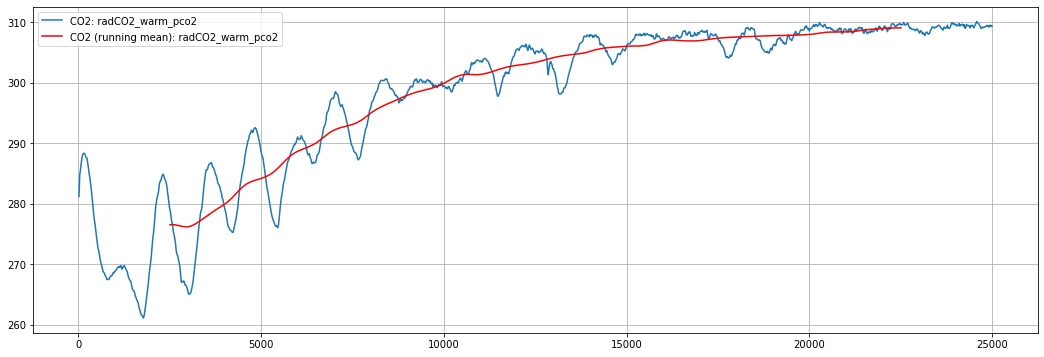

In [53]:
# Check CO2
N=250
periods = str(len(glob(os.path.join(dir, run) + '/out/Cpl*')))
CO2 = np.zeros((int(periods),240))       
CO2_smooth = read_ncfile(filename=os.path.join(datadir,'smooth',run+'_CO2.nc'), varname='CO2')
for n in range(int(periods)):
    pCO2 = read_ncfile(filename=glob(os.path.join(dir,run,'out','Cpl'+str(n+1),'MON/pCO2StDiag.*'))[0],
                       varname='aim_pCO2_ave')
    #nyear = len(np.squeeze(pCO2))/12
    #for mon in range(12):
    #    CO2[n,mon] = np.mean(pCO2[mon:mon+int(nyear)*12:12])
    CO2[n,:] = np.squeeze(pCO2)
ann_CO2 = np.mean(CO2, axis=1)
ann_CO2_smooth = np.mean(CO2_smooth, axis=1)
                
fig, ax = plt.subplots(figsize=(18,6))
years = np.arange(1, ann_CO2.size+1) * 20.
ax.plot(years, ann_CO2, label='CO2: '+run)
ax.plot(years[int((N-1)/2):len(TS[run])-int((N-1)/2)-1]+10.,ann_CO2_smooth, 'r', label='CO2 (running mean): '+run)
ax.legend()
ax.grid()